# Netflix data analytics 

### Loading the library and  data

In [2]:
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv(r'D:\tensorflow object detection\NetflixAnalytics\notebook\netflix_titles.csv')

## Summary of the data

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 8807 rows and 12 columns


In [5]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
### Checking the null values:

data.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

* From the above datatype description we see that the release_year is of integer type,date added is object type whose datatype should have been date .
* When we check the null values , we see that there are 5 columns having null values - director,cast,country,date_added and rating.



In [7]:
### Changing the date added and release_year to date:

data['date_added']=pd.to_datetime(data['date_added'])
data['release_year']=pd.to_datetime(data['release_year'],format="%Y")
data['release_year']=data['release_year'].dt.year

In [8]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Exploratory Data Analysis

### Number of titles

In [9]:
## Check the number of titles present in the dataset:

print(f'There are {data.show_id.nunique()} shows in the netflix dataset')

There are 8807 shows in the netflix dataset


We understand that each row is a unique title .Now checking the categories of titles available.

In [10]:
(data['type'].value_counts()/data.shape[0])*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

69 % of the titles in this dataset is of Movie type whereas 30 % is of TV show type.

### Number of titles by date addded:

two columns - year added and month added and understand the trend of titles added in the platform.

In [11]:
data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month

In [12]:
data['year_added'].value_counts().sort_index()

2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      23
2015.0      77
2016.0     422
2017.0    1166
2018.0    1628
2019.0    1999
2020.0    1878
2021.0    1498
Name: year_added, dtype: int64

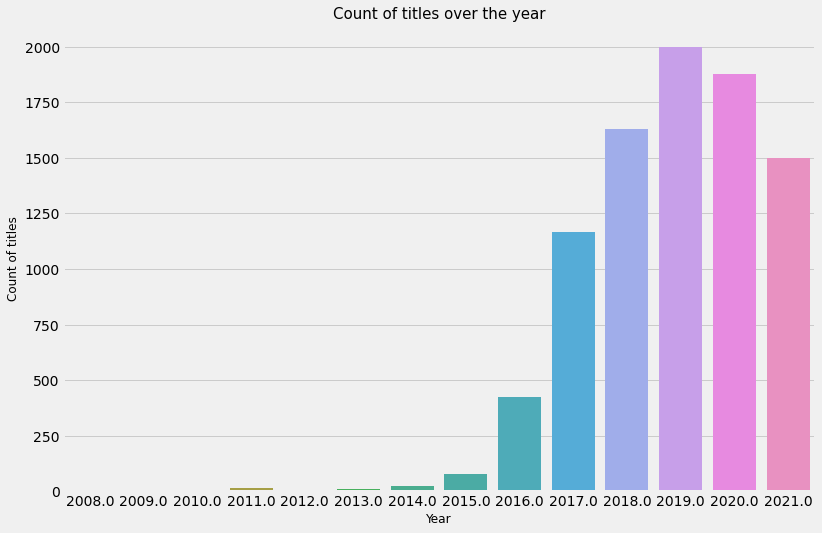

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='year_added',data=data)
plt.ylabel('Count of titles',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Count of titles over the year",fontsize=15)
plt.show()

From the plot above , we understand that the number of titles over the years have increased.Lets plot the same with respect to the type of title. - Movie or TV Show.

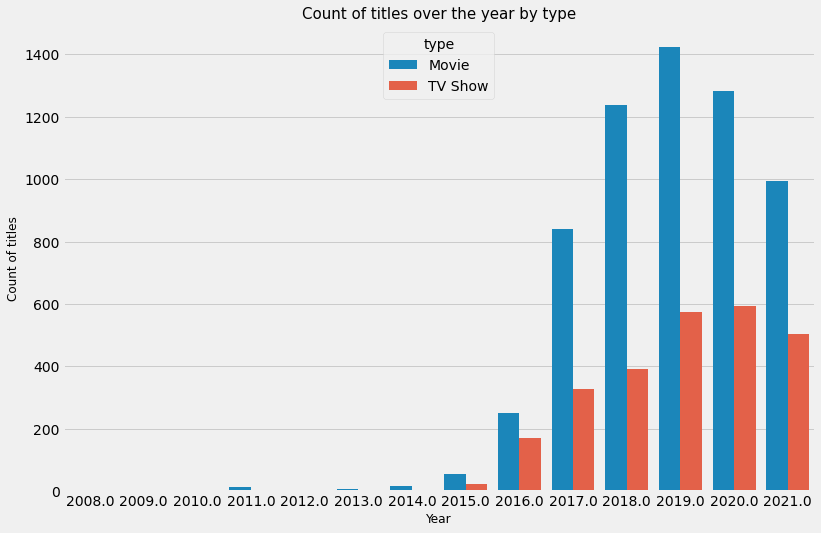

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='year_added',data=data,hue='type')
plt.ylabel('Count of titles',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Count of titles over the year by type",fontsize=15)
plt.show()

Clearly , we understand that the number of tv shows added to the platform has increased over the years whereas the numer of movies has hit a peak in 2019 and seen a dip in 2020.Lets check the growth of the TV shows over the year and which year has seen the highest growth.

In [24]:
tvshow=data[data['type']=='TV Show']['year_added'].value_counts().sort_index()

In [25]:
tvshow.pct_change()

2008.0         NaN
2013.0    4.000000
2014.0    0.000000
2015.0    3.600000
2016.0    6.434783
2017.0    0.912281
2018.0    0.195719
2019.0    0.470588
2020.0    0.033043
2021.0   -0.149832
Name: year_added, dtype: float64

There has been a 5.16 % increase in TV shows in the year 2016.

### Number of titles by month added:

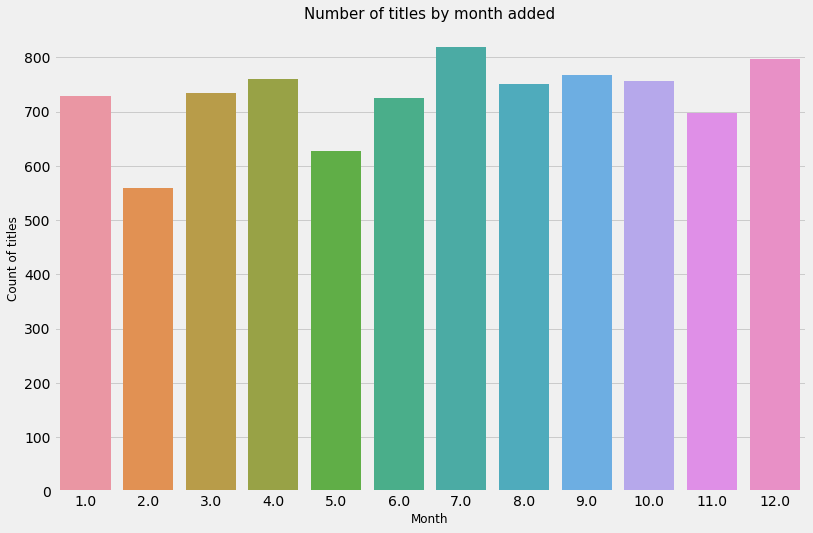

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(x='month_added',data=data)
plt.ylabel("Count of titles",fontsize=12)
plt.xlabel("Month",fontsize=12)
plt.title("Number of titles by month added",fontsize=15)
plt.show()

Maximum titles were added between the month of Oct-Dec.Lets check whether the trend is change is different between TV show and movie title.

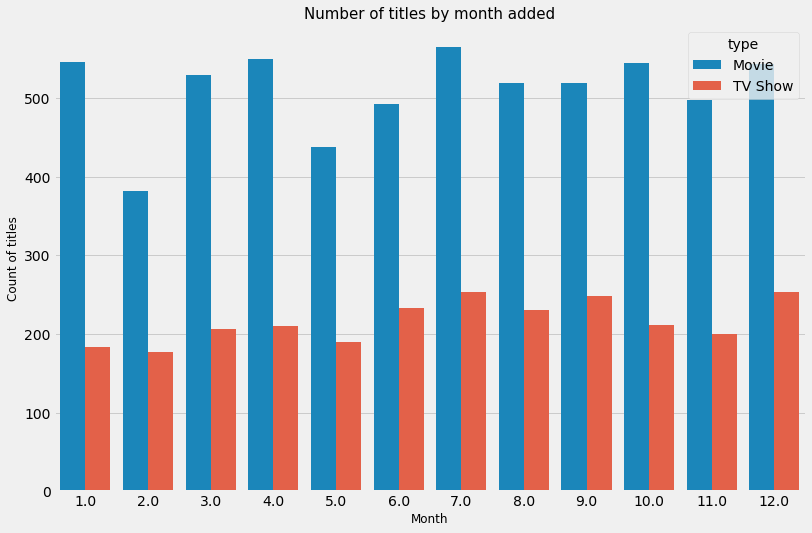

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x='month_added',data=data,hue='type')
plt.ylabel("Count of titles",fontsize=12)
plt.xlabel("Month",fontsize=12)
plt.title("Number of titles by month added",fontsize=15)
plt.show()

The trend is the same for TV show and movie titles.Oct-Dec were the months where most of the titles were added.

### Movie/TV Show Listing

From the summary of the data , there is a column called listed_in which specifies what is the genre of each of the movies.There are multiple genres for a single title.Lets check how is the genre distributed in this dataset.

In [28]:
data['listed_in']=data['listed_in'].astype('str')
data['num_listing']=data['listed_in'].apply(lambda x:len(x.split(",")))

In [29]:
listing=set()
count_listings=Counter()

for listings in data['listed_in']:
    listings=listings.split(",")
    listing.update([lst.strip() for lst in listings])
    for lst in listings:
        count_listings[lst.strip()]+=1

In [30]:
listings_title=pd.DataFrame.from_dict(count_listings,orient='index')
listings_title.sort_values(0,ascending=False,inplace=True)
listings_title.rename(columns={0:'count'},inplace=True)

In [31]:
data['num_listing'].describe()

count    8807.000000
mean        2.194050
std         0.784341
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: num_listing, dtype: float64

In [32]:

print(f'There are {len(listings_title)} genres in the database')

There are 42 genres in the database


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure'),
  Text(6, 0, 'TV Dramas'),
  Text(7, 0, 'Independent Movies'),
  Text(8, 0, 'Children & Family Movies'),
  Text(9, 0, 'Romantic Movies')])

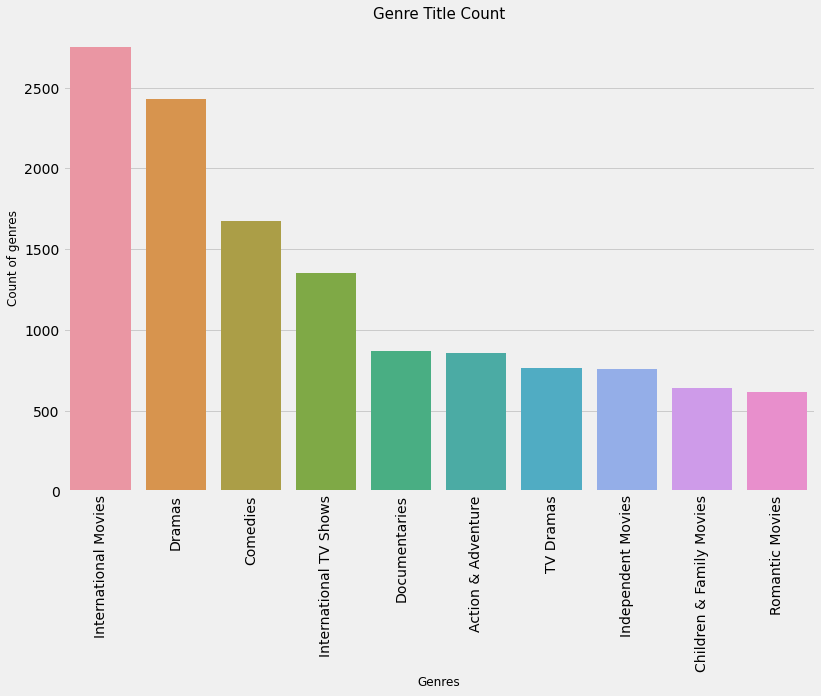

In [33]:
## Top 10 genre titles available:

plt.figure(figsize=(12,8))
sns.barplot(x=listings_title[:10].index,y='count',data=listings_title[:10])
plt.ylabel("Count of genres",fontsize=12)
plt.xlabel("Genres",fontsize=12)
plt.title("Genre Title Count",fontsize=15)
plt.xticks(rotation=90)

From the plot of top 10 genre titles available,there are more than 2000+ titles listed as International Movies followed by ~2000 dramas and ~1300 comedies. 

### Countries of the titles:

It is not sure from the data description what exactly the countries column refer to -I am assuming it to be the country of origin of the title.Lets analyse this column in a similar way as that of listed_in column.

In [34]:
data['country']=data['country'].astype('str')
data['num_countries']=data['country'].apply(lambda x:len(x.split(",")))

country=set()
count_country=Counter()

for c in data['country']:
    if c not in ['nan','']:
        c=c.split(",")
        country.update([cs.strip() for cs in c])
        for cs in c:
            count_country[cs.strip()]+=1
        
        
countries_df=pd.DataFrame.from_dict(count_country,orient='index')
countries_df.sort_values(0,ascending=False,inplace=True)
countries_df.rename(columns={0:'count'},inplace=True)

In [35]:
data['num_countries'].describe()

count    8807.000000
mean        1.231975
std         0.668818
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        12.000000
Name: num_countries, dtype: float64

In [36]:
print(f'There are {len(country)} countries titles in the database')

There are 123 countries titles in the database


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'South Korea'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Mexico')])

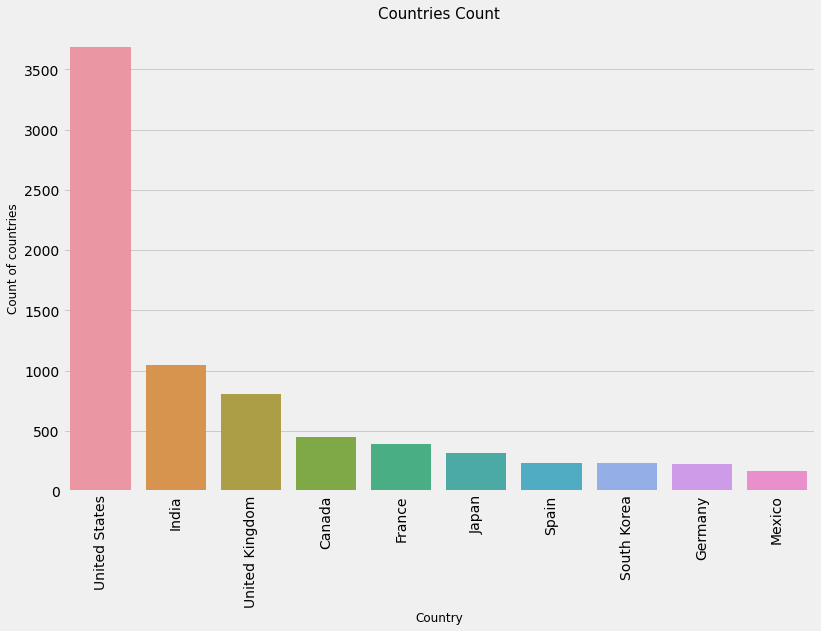

In [37]:
## Top 10 countries titles available:

plt.figure(figsize=(12,8))
sns.barplot(x=countries_df[:10].index,y='count',data=countries_df[:10])
plt.ylabel("Count of countries",fontsize=12)
plt.xlabel("Country",fontsize=12)
plt.title("Countries Count",fontsize=15)
plt.xticks(rotation=90)

* There are 3000+ titles from United States followed by India and UK .But the difference in the number of titles of US and India is very high.

### Ratings 

In [40]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

TV-MA and TV-14 are the most common ratings available in this database.Lets check the rating with respect to type.


### Rating with respect to type

In [41]:
data.groupby('type')['rating'].value_counts()

type     rating  
Movie    TV-MA       2062
         TV-14       1427
         R            797
         TV-PG        540
         PG-13        490
         PG           287
         TV-Y7        139
         TV-Y         131
         TV-G         126
         NR            75
         G             41
         TV-Y7-FV       5
         NC-17          3
         UR             3
         66 min         1
         74 min         1
         84 min         1
TV Show  TV-MA       1145
         TV-14        733
         TV-PG        323
         TV-Y7        195
         TV-Y         176
         TV-G          94
         NR             5
         R              2
         TV-Y7-FV       1
Name: rating, dtype: int64

There is no difference between the 1st and 2nd movie rating with respect to type.Is there any rating unique to a TV show or to a movie ?Lets check.

In [42]:
## check if there exist unique rating type in tv show 
set(data[data['type']=='TV Show'].rating.unique())-set(data[data['type']=='Movie'].rating.unique())

set()

In [43]:
#check if there exist unique movie rating type
set(data[data['type']=='Movie'].rating.unique())-set(data[data['type']=='TV Show'].rating.unique())

{'66 min', '74 min', '84 min', 'G', 'NC-17', 'PG', 'PG-13', 'UR'}

From the above output,it is seen that G,NC-17,PG,PG-13 and UR are only certified for movies and no tv show has this rating.

### Directors

In [44]:
## How many titles have more than one directors:
data['director']=data['director'].astype('str')
data['num_directors']=data['director'].apply(lambda x:len(x.split(",")))

In [45]:
multi_director=data.loc[data['num_directors']>1,]

In [46]:
multi_director.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,num_listing,num_countries,num_directors
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",nan,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,9.0,1,1,2
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,nan,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,2021.0,9.0,2,1,2
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",nan,2021-09-21,2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...,2021.0,9.0,1,1,2
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",nan,2021-09-17,2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so...",2021.0,9.0,3,1,3
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,nan,2021-09-15,2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo...",Through exclusive interviews and archival foot...,2021.0,9.0,3,1,3


In [47]:
multi_director['num_directors'].value_counts().sort_index()

2     542
3      37
4      15
5       7
7       2
8       1
9       2
10      3
11      2
12      2
13      1
Name: num_directors, dtype: int64

The maximum number of directors collaborated for a movie is 13.Let us check the titles where the number of directors is more than 5.

In [48]:
multi_director.loc[multi_director['num_directors']>5,['title','director','num_directors']].sort_values(by='num_directors',ascending=False)

,title,director,num_directors
5887,Walt Disney Animation Studios Short Films Coll...,"Chris Buck, Jennifer Lee, Patrick Osborne, Lau...",13
6910,HALO Legends,"Shinji Aramaki, Mamoru Oshii, Hideki Futamura,...",12
7515,Movie 43,"Peter Farrelly, Will Graham, Steve Carr, Griff...",12
3124,"Sincerely Yours, Dhaka","Nuhash Humayun, Syed Ahmed Shawki, Rahat Rahma...",11
5837,X: Past Is Present,"Hemant Gaba, Pratim D. Gupta, Sudhish Kamath, ...",11
3485,Sturgill Simpson Presents Sound & Fury,"Jumpei Mizusaki, Koji Morimoto, Michael Arias,...",10
6624,Don Quixote: The Ingenious Gentleman of La Mancha,"Mahin Ibrahim, Austin Kolodney, Will Lowell, D...",10
7164,Kahlil Gibran's The Prophet,"Roger Allers, Gaëtan Brizzi, Paul Brizzi, Joan...",10
297,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...",9
6984,Holidays,"Anthony Scott Burns, Nicholas McCarthy, Adam E...",9


In [49]:
###Directors with most titles:
director=data.loc[data['director']!='nan','director'].str.split(",",expand=True).stack().reset_index()
director.rename(columns={0:'director'},inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Raúl Campos'),
  Text(2, 0, ' Jan Suter'),
  Text(3, 0, 'Marcus Raboy'),
  Text(4, 0, 'Suhas Kadav'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Martin Scorsese'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Youssef Chahine')])

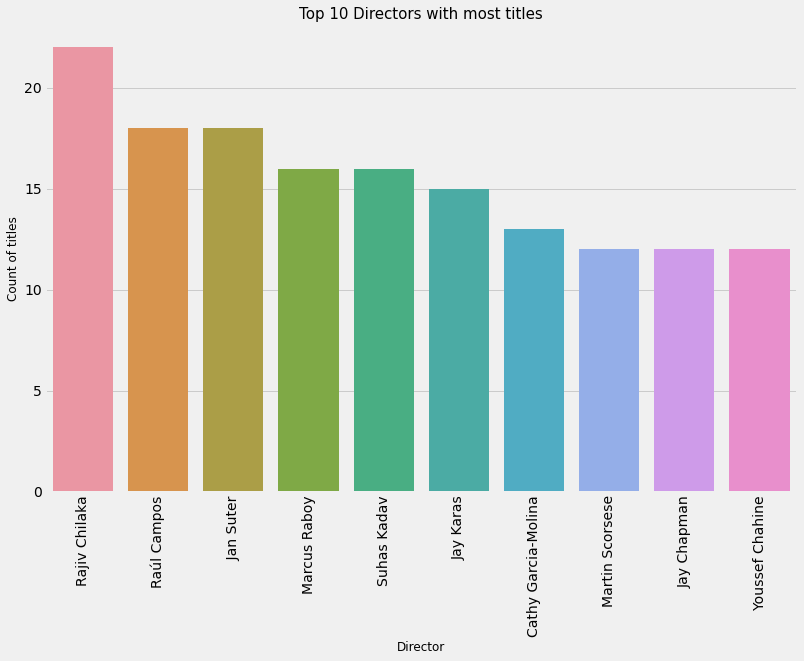

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(x=director['director'],data=director,order=director['director'].value_counts()[:10].index)
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count of titles",fontsize=12)
plt.title("Top 10 Directors with most titles",fontsize=15)
plt.xticks(rotation=90)

Raul Campos and Jan Suter are the directors having 18 titles each.Lets check individually by the type of title.

In [51]:
director=data.loc[data['director']!='nan',].set_index('type').director.str.split(",",expand=True).stack().reset_index('type')
director.rename(columns={0:'directors'},inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Alastair Fothergill'),
  Text(1, 0, 'Ken Burns'),
  Text(2, 0, 'Jung-ah Im'),
  Text(3, 0, 'Joe Berlinger'),
  Text(4, 0, 'Shin Won-ho'),
  Text(5, 0, ' Gautham Vasudev Menon'),
  Text(6, 0, 'Hsu Fu-chun'),
  Text(7, 0, 'Stan Lathan'),
  Text(8, 0, 'Iginio Straffi'),
  Text(9, 0, 'Rob Seidenglanz')])

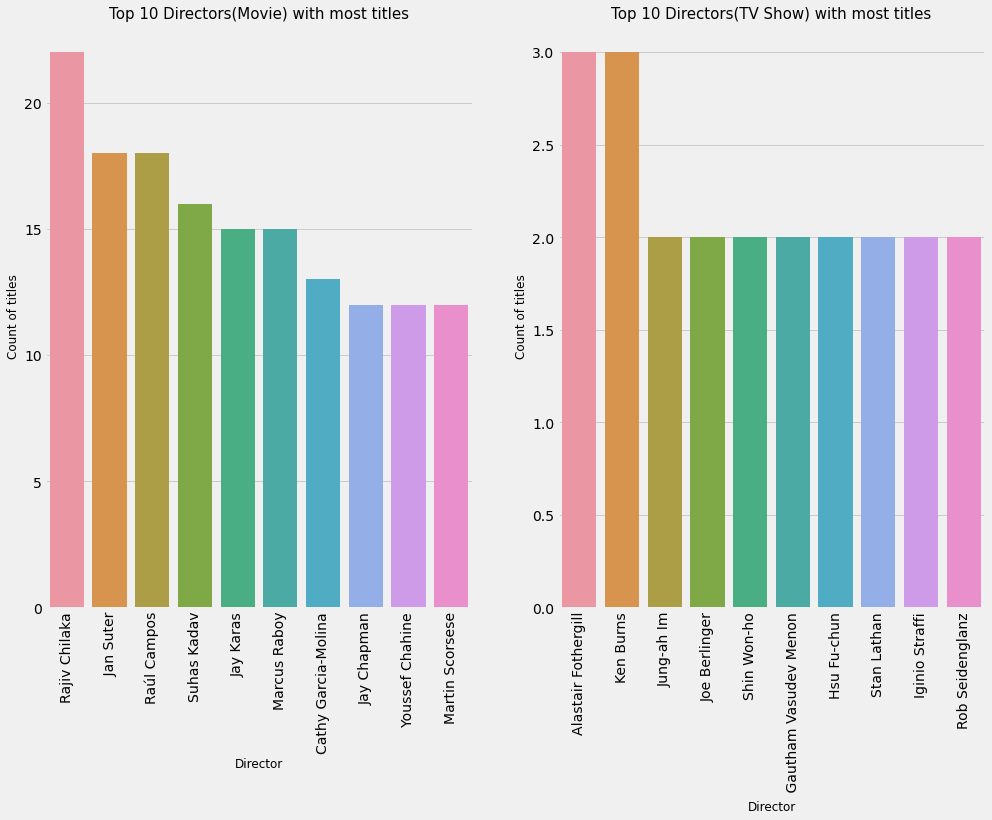

In [52]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.countplot(x=director.loc[director['type']=='Movie','directors'],data=director[director['type']=='Movie'],order=director.loc[director['type']=='Movie','directors'].value_counts()[:10].index)
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count of titles",fontsize=12)
plt.title("Top 10 Directors(Movie) with most titles",fontsize=15)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(x=director.loc[director['type']=='TV Show','directors'],data=director[director['type']=='TV Show'],order=director.loc[director['type']=='TV Show','directors'].value_counts()[:10].index)
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count of titles",fontsize=12)
plt.title("Top 10 Directors(TV Show) with most titles",fontsize=15)
plt.xticks(rotation=90)

Analysing the top 10 list between movie and tv show , it is seen that there is no overlap between the directors.Lets check if there exist any director who have directed both a tv show and a movie.

In [55]:
### directors who have both tv show and movie title:
all_dup=director.groupby('directors')['type'].nunique()

In [56]:
all_dup[all_dup>1]

directors
 Abhishek Chaubey       2
 Alban Teurlai          2
 Anurag Kashyap         2
 Hiroyuki Seshita       2
 John Paul Tremblay     2
                       ..
Tiller Russell          2
Tosin Coker             2
Tsutomu Mizushima       2
Vikramaditya Motwane    2
Ziad Doueiri            2
Name: type, Length: 66, dtype: int64

The above directors have both tv show and movie to their credit.